In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [8]:
df = pd.read_csv("height-weight.csv")

In [9]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


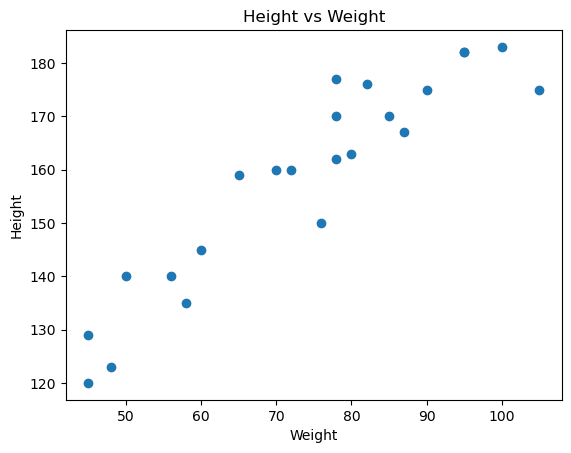

In [12]:
## scatter plot 

plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Height vs Weight')
plt.show()

In [13]:
## finding correlation

df.corr()


,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


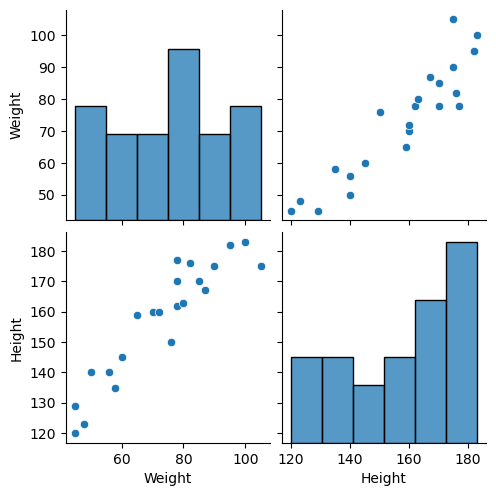

In [16]:
## seaborn for visulization

import seaborn as sns
sns.pairplot(df)
plt.show()


In [29]:
## independent and dependent feature 
df.head()
x=df[['Weight']] #independent feature should be data frame or 2 dimension array
y=df['Height'] # this variable can be in series  or 1d frame
x.head()
y.head()


0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64

In [30]:
np.array(y).shape

(23,)

In [31]:
# train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)


In [32]:
X_train.shape

(17, 1)

In [33]:
## standaraization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
X_train=scaler.fit_transform(X_train)

In [37]:
X_test=scaler.transform(X_test)
X_test

c:\Users\Pacific BD\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-4.3699745 ],
       [-4.3699745 ],
       [-4.49108234],
       [-4.30758562],
       [-4.41768365],
       [-4.27088627]])

In [38]:
# apply linear regression 

from sklearn.linear_model import LinearRegression

In [40]:
regression = LinearRegression(n_jobs=-1)
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [41]:
regression.coef_

array([17.2982057])

In [42]:
regression.intercept_

156.47058823529412

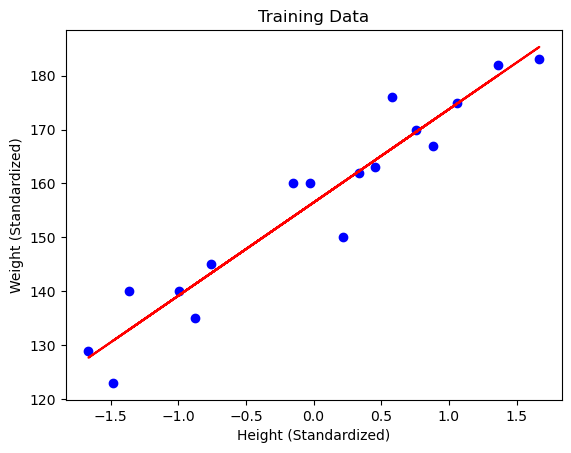

In [43]:
# plot training data plot best fit line

plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regression.predict(X_train), color='red')
plt.title('Training Data')
plt.xlabel('Height (Standardized)')
plt.ylabel('Weight (Standardized)')
plt.show()
 

# prediction for test data 
1. predicted height output = intercept+coef_(weight)
2.y_pred_test= 156.470 +17.29(X_test)

In [46]:
# prediction for test data 

y_pred = regression.predict(X_test)


In [50]:
# performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 82.97662409755104
Mean Squared Error: 7276.932884039703
Root Mean Squared Error: 85.3049405605543


In [51]:
# r square

from sklearn.metrics import r2_score 

In [52]:
score = r2_score(y_test, y_pred)
print(score)

-15.723241865651406


In [53]:
# ols linear regression 

import statsmodels.api as sm

In [54]:
model = sm.OLS(y_train, X_train).fit()

In [55]:
y_pred = model.predict(X_test)

In [56]:
print(y_pred)

[-75.59271791 -75.59271791 -77.68766619 -74.51350212 -76.41800056
 -73.87866931]


In [57]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sat, 23 Aug 2025   Prob (F-statistic):                       0.664
Time:                        03:49:39   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\Pacific BD\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [59]:
# prediction for new data 

model.predict([[72]])

array([1245.47081071])